In [1]:
import env
import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

#Scaling Processers
import sklearn.preprocessing

from datetime import date
import explore

In [2]:
#Gets connection to Code Up database using env file
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'


In [3]:
#--------------------------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------------
# Get zillow.csv Data
def get_mall_data():
    filename = "mall_customers.csv"

    if os.path.isfile(filename):
        zillow = pd.read_csv(filename)
    else:
        zillow = pd.read_sql('SELECT * FROM customers', 
        get_connection('mall_customers'))
        zillow.to_csv(index = False)
    return zillow

In [4]:
mall = get_mall_data()
mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
mall.shape

(200, 5)

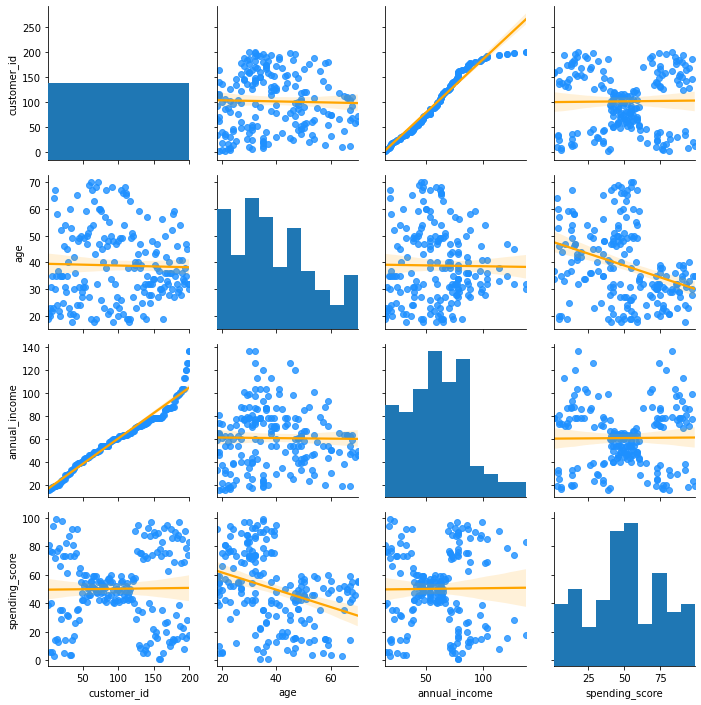

In [10]:
explore.plot_variable_pairs(mall)

In [5]:
explore.months_to_years(mall, 'age')

,customer_id,gender,age,annual_income,spending_score
0,1,Male,1.583333,15,39
1,2,Male,1.750000,15,81
2,3,Female,1.666667,16,6
3,4,Female,1.916667,16,77
4,5,Female,2.583333,17,40
...,...,...,...,...,...
195,196,Female,2.916667,120,79
196,197,Female,3.750000,126,28
197,198,Male,2.666667,126,74
198,199,Male,2.666667,137,18


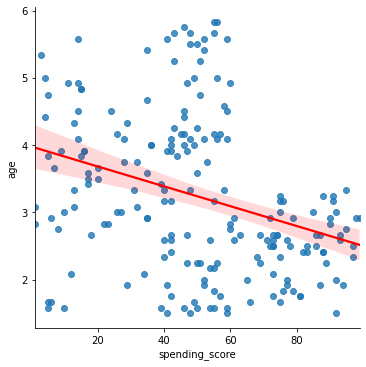

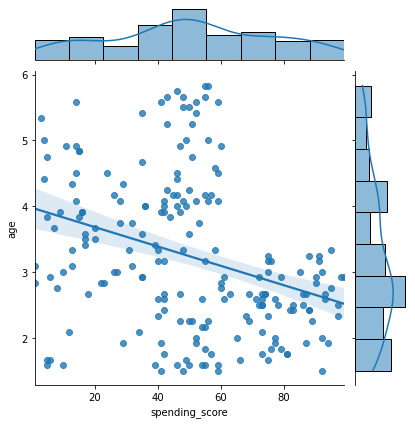

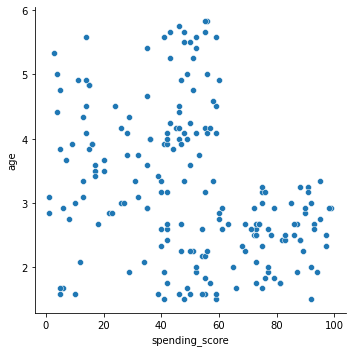

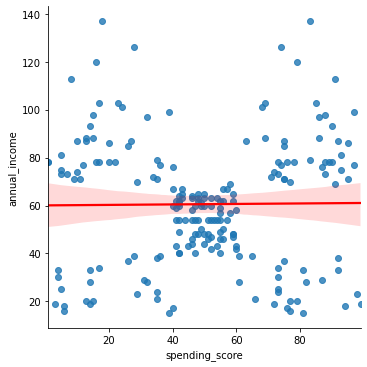

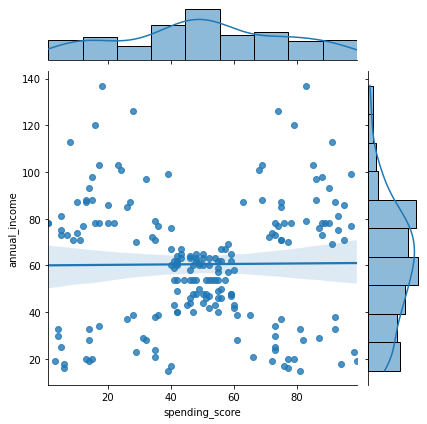

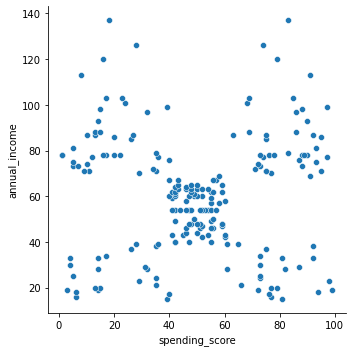

In [11]:
list_mall_features = mall[['age', 'annual_income']]
explore.plot_categorical_and_continuous_vars(mall, 'spending_score', list_mall_features)